In [1]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
transactions = [['Bread', 'Milk'],
                ['Bread', 'Cheese', 'Juice', 'Eggs'],
                ['Milk', 'Cheese', 'Juice', 'Coke' ],
                ['Bread', 'Milk', 'Cheese', 'Juice'],
                ['Bread', 'Milk', 'Cheese', 'Coke']]

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te.fit(transactions)

rows = te.transform(transactions)
print(rows)

[[ True False False False False  True]
 [ True  True False  True  True False]
 [False  True  True False  True  True]
 [ True  True False False  True  True]
 [ True  True  True False False  True]]


In [3]:
te.columns_

['Bread', 'Cheese', 'Coke', 'Eggs', 'Juice', 'Milk']

In [4]:
import pandas as pd

df_transacation = pd.DataFrame(rows, columns=te.columns_)
df_transacation

,Bread,Cheese,Coke,Eggs,Juice,Milk
0,True,False,False,False,False,True
1,True,True,False,True,True,False
2,False,True,True,False,True,True
3,True,True,False,False,True,True
4,True,True,True,False,False,True


In [5]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_transacation, min_support= 0.4, use_colnames= True)

frequent_itemsets

,support,itemsets
0,0.8,(Bread)
1,0.8,(Cheese)
2,0.4,(Coke)
3,0.6,(Juice)
4,0.8,(Milk)
5,0.6,"(Bread, Cheese)"
6,0.4,"(Bread, Juice)"
7,0.6,"(Milk, Bread)"
8,0.4,"(Coke, Cheese)"
9,0.6,"(Juice, Cheese)"


In [6]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Bread),1
1,0.8,(Cheese),1
2,0.4,(Coke),1
3,0.6,(Juice),1
4,0.8,(Milk),1
5,0.6,"(Bread, Cheese)",2
6,0.4,"(Bread, Juice)",2
7,0.6,"(Milk, Bread)",2
8,0.4,"(Coke, Cheese)",2
9,0.6,"(Juice, Cheese)",2


In [7]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric= 'confidence', min_threshold= 0.6)

#rules = rules.sort_values(['confidence'], ascending= [False])
rules = rules.sort_values('confidence', ascending= False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
20,"(Coke, Cheese)",(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
19,"(Coke, Milk)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
22,(Coke),"(Milk, Cheese)",0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333
23,"(Milk, Juice)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
5,(Coke),(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
6,(Juice),(Cheese),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.500000,0.750000,1.000000,0.875000
12,"(Bread, Juice)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
10,(Coke),(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
1,(Cheese),(Bread),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000
0,(Bread),(Cheese),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000


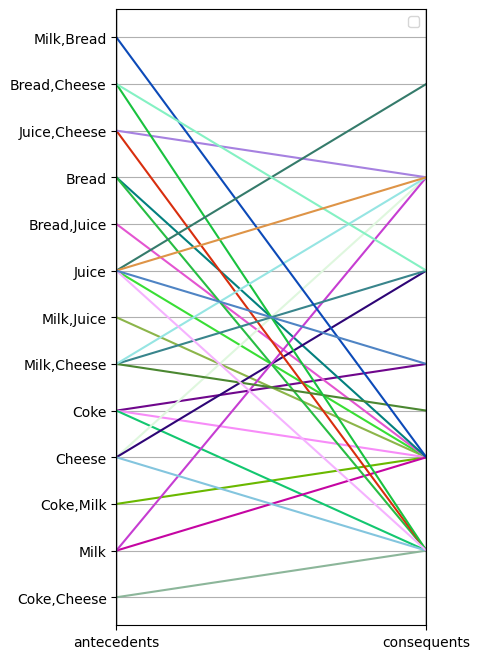

In [8]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules['rule_n'] = rules.index

coords = rules[['antecedents','consequents','rule_n']]

plt.figure(figsize=(4,8))

parallel_coordinates(coords, 'rule_n')

plt.legend([])

plt.grid(True)
plt.show()

In [9]:
import seaborn as sns

metrix = rules.pivot(index= 'antecedents', columns= 'consequents', values= 'confidence')
metrix

consequents,Bread,"Bread,Cheese",Cheese,Coke,Juice,Milk,"Milk,Cheese"
antecedents,,,,,,,
Bread,NaN,NaN,0.750000,NaN,NaN,0.750000,NaN
"Bread,Cheese",NaN,NaN,NaN,NaN,0.666667,0.666667,NaN
"Bread,Juice",NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Cheese,0.750000,NaN,NaN,NaN,0.750000,0.750000,NaN
Coke,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000
"Coke,Cheese",NaN,NaN,NaN,NaN,NaN,1.000000,NaN
"Coke,Milk",NaN,NaN,1.000000,NaN,NaN,NaN,NaN
Juice,0.666667,0.666667,1.000000,NaN,NaN,0.666667,0.666667
"Juice,Cheese",0.666667,NaN,NaN,NaN,NaN,0.666667,NaN


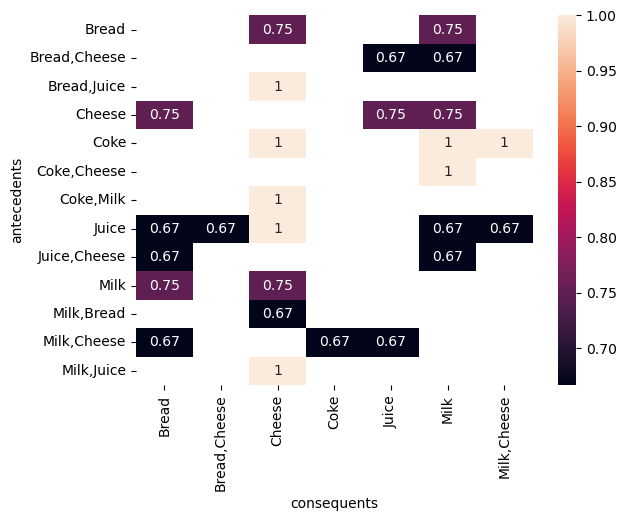

In [10]:
sns.heatmap(metrix, annot= True)

plt.yticks(rotation= 0)
plt.xticks(rotation= 90)

plt.show()

In [11]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski', 'rule_n'],
      dtype='object')

In [12]:
def predict(items, rules, max_results= 6):
    
    preds = rules[rules['antecedents'] == items]
    preds = preds[['consequents', 'confidence']]

    preds.sort_values('confidence', ascending= True)

    return preds[:max_results]

preds = predict({'Cheese','Milk'}, rules)
preds

,consequents,confidence


In [22]:
def predict(items, rules, max_results= 6):
    
    preds = rules[rules['antecedents'].isin(items)]
    
    preds = preds[['consequents','confidence']]
    
    preds.sort_values('confidence', ascending=False)
    
    return preds[:max_results]

preds = predict({'Cheese','Milk'}, rules)
preds

,consequents,confidence
1,Bread,0.75
8,Cheese,0.75
7,Juice,0.75
3,Bread,0.75
9,Milk,0.75


In [23]:
def predict(items, rules, max_results= 6):
    
    preds = rules[rules['antecedents'] == items]
    
    preds = preds[['consequents','confidence']]
    
    preds.sort_values('confidence', ascending=False)
    
    return preds[:max_results]

preds = predict('Cheese', rules)
preds

,consequents,confidence
1,Bread,0.75
7,Juice,0.75
9,Milk,0.75


In [24]:
def predict(items, rules, max_results=6):
    """
    Given:
      - items:   a Python set of “items you have”
      - rules:   a DataFrame with a column 'antecedents' (each a Python set)
    Returns:
      - DataFrame of the top N consequents, sorted by confidence.
    """
    # Keep only those rules whose antecedents ⊆ items
    mask = rules['antecedents'].apply(lambda ant: ant.issubset(items))
    preds = rules.loc[mask, ['consequents','confidence']]
    # Sort and take top N
    preds = preds.sort_values('confidence', ascending=False).head(max_results)
    return preds

# Example usage:
preds = predict({'Cheese','Milk'}, rules)
print(preds)


C:\Users\User\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\User\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\User\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


AttributeError: 'str' object has no attribute 'issubset'